# Curso Análisis de Redes

## Cátedra Teoría de las Telecomunicaciones - Universidad ORT Uruguay



# Mecanismos de control de acceso al medio (MAC), 2a. Parte

In [1]:
#using Pkg;Pkg.instantiate(); Pkg.update()

## Carrier Sense Multiple Access

La principal ineficiencia de ALOHA es que los slots son de un tamaño entero de paquete, y si quedan vacíos no se utilizan. La razón es que las estaciones *no pueden saber si el medio está en uso o no*.

**Idea:** escuchar el medio antes de acceder. Solo acceder si el mismo está libre.

Esto permite que se separe el largo del slot *de contención* (donde se compite) del tamaño de transmisión, ya que si alguien accede al medio puede usarlo un tiempo largo sin ser interrumpido. El tiempo no puede ser demasiado largo para permitir rotación entre las estaciones.

Esto lleva al mecanismo **CSMA**.

### Protocolo CSMA

Consideremos el siguiente protocolo:

> **Protocolo CSMA ($p$-persistente)**:
>
> * Cada estación transmite paquetes de largo $L=1$ durante tiempo $T=1$.
>
> * Todas las estaciones escuchan el medio. Cuando este queda libre un tiempo "corto" $\beta<1$:
>
>      * Se divide el tiempo en slots de tamaño $\beta$.
>      * Cada estación intenta acceder en un slot con probabilidad $p$ de forma independiente.
>
> * Si una única estación accede en un slot, gana el acceso sin interrupciones.
>
> * Si dos o más estaciones acceden *en el mismo slot* se produce una colisión, que dura lo mismo que la transmisión.


### Análisis por ciclos de CSMA

Existen 3 tipos de ciclo en este sistema, que se representan en el siguiente diagrama

![Ciclos CSMA](images/csma_ciclos.png) 

### Análisis por ciclos de CSMA

Separemos el tiempo en ciclos. Sea $L$ la cantidad de paquetes transmitidos con éxito en un ciclo y $T$ la duración del ciclo, entonces:

**Casos:**

 * Slot Idle: si nadie transmite. Probabilidad $P(X=0) = (1-p)^N$.
 * Éxito: si transmite uno solo. Probabilidad $P(X=1) = Np(1-p)^{N-1}$.
 * Colisión: en otro caso.
 
**Tabla de ciclos**:

| Caso  | Prob.  | $L$ | $T$  |
|---|:-----------:|---|---|
| Idle | $$(1-p)^N$$  | $0$  | $\beta$  |
| Exito | $Np(1-p)^{N-1}$  | $1$ | $1+\beta$ |
| Colision | $1-(1-p)^N-Np(1-p)^{N-1}$  | $0$  | $1+\beta$  |


### Throughput de saturación de CSMA

De la tabla anterior concluimos que:

$$\bar{L} = Np(1-p)^{N-1}, \quad \bar{T} = \beta + 1-(1-p)^N$$

De donde el *throughput* de CSMA se calcula como:

$$Thr = \frac{\bar{L}}{\bar{T}} = \frac{Np(1-p)^{N-1}}{\beta + 1-(1-p)^N}$$

### Ejemplo


In [2]:
using Plots, LaTeXStrings; default(size=(1000,400), legendfontsize=11)

function csma_throughput(p,N,beta)
   return N*p*(1-p)^(N-1)/(beta+1-(1-p)^N) 
end

csma_throughput (generic function with 1 method)

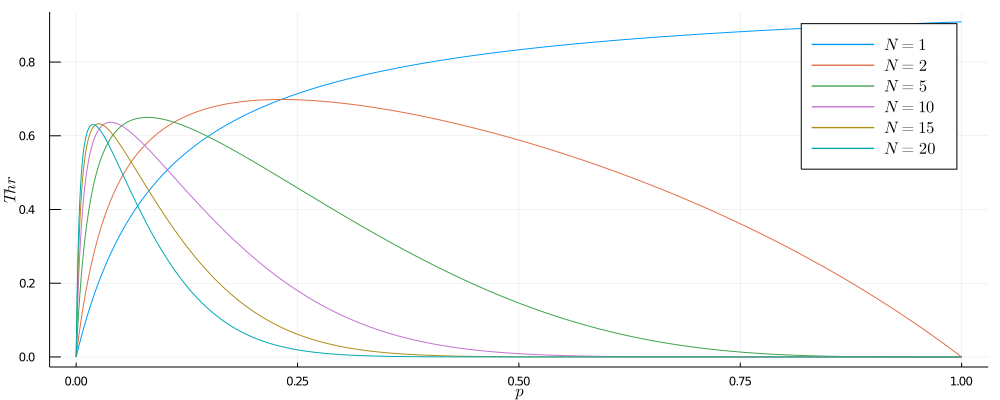

In [3]:
beta=.1
p=0:0.001:1
NN=[1,2,5,10,15,20]
plt=plot()
for N in NN
    plot!(p,csma_throughput.(p,N,beta),xlabel=L"p", ylabel=L"Thr",label=L"N=%$N")
end
plt

### Probabilidad óptima de acceso

Lamentablemente, en este caso no existe una expresión para la probabilidad óptima de acceso. Se puede calcular numéricamente.

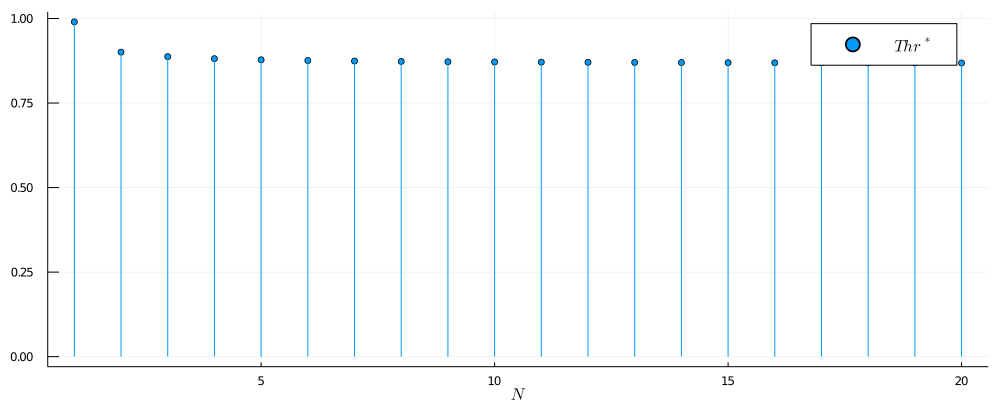

In [4]:
function max_throughput_csma(N,beta)
    p=(0:0.001:1)
    Thr = csma_throughput.(p,N,beta)
    Thropt,i = findmax(Thr)
    return Thropt,p[i]
end

beta=0.01
NN=1:20
out = max_throughput_csma.(NN,beta)
Thr = [x[1] for x in out]
p = [x[2] for x in out]

plot(NN,Thr, lt=:stem, marker=:circle, label=L"Thr^*", xlabel=L"N")

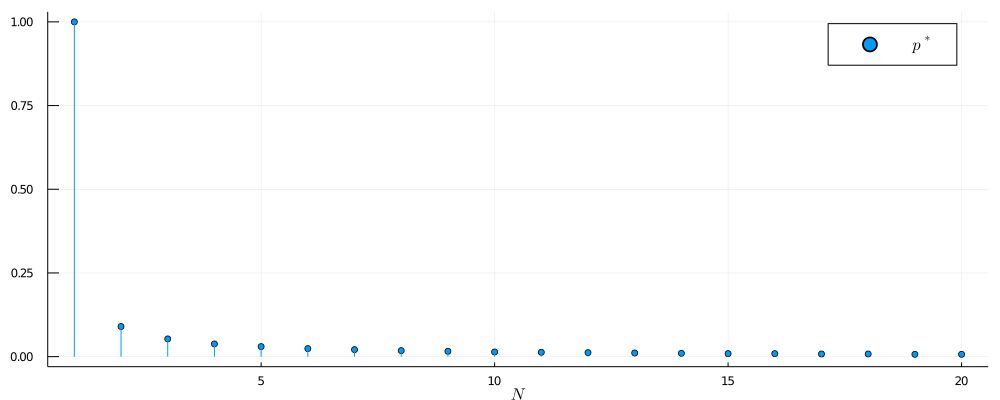

In [5]:
plot(NN,p, lt=:stem, marker=:circle, label=L"p^*", xlabel=L"N")

### Comportamiento asintótico

Para $N$ grande y $\beta \ll 1$, vale la siguiente aproximación:

> **Throughput CSMA**
>
> $$p^* \approx \frac{\sqrt{2\beta}}{N} \quad Thr^* \approx \frac{1}{1+\sqrt{2\beta}}.$$

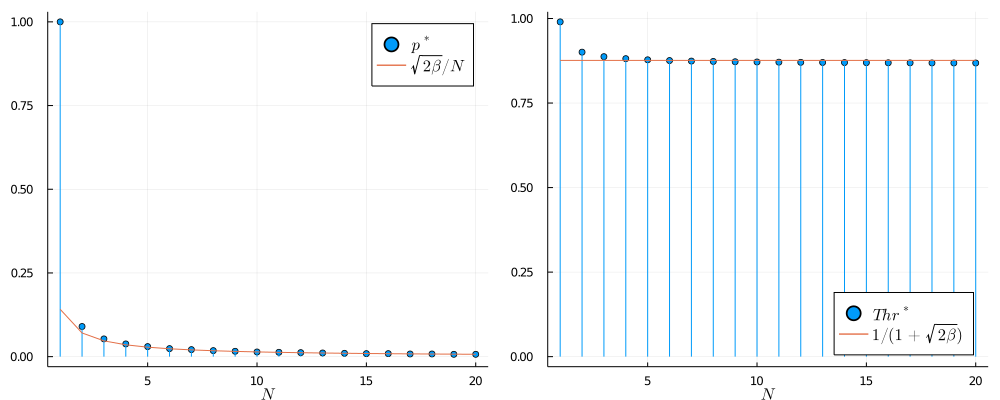

In [6]:
p1=plot(NN,p, lt=:stem, marker=:circle, label=L"p^*", xlabel=L"N")
plot!(p1,NN,sqrt(2*beta)./NN, label=L"\sqrt{2\beta}/N")
p2=plot(NN,Thr, lt=:stem, marker=:circle, label=L"Thr^*", xlabel=L"N", legend=:bottomright)
plot!(p2,NN,1 ./(1 .+sqrt(2*beta))*ones(size(NN)), label=L"1/(1+\sqrt{2\beta})")
plt=plot(p1,p2)

### Simulación

In [7]:
using Distributions

function simula_csma(p,N,beta,Tfinal)
    
    t = 0.0 
    T = Float64[]
    X = String[];
    
    d=Binomial(N,p)
    
    while t<Tfinal

        push!(T,t)

        aux = rand(d)
        if aux == 0
            push!(X,"Idle")
            t = t+beta
        elseif aux == 1
            push!(X,"Exito")
            t = t+1+beta
        else
            push!(X,"Colision")
            t = t+1+beta
        end
    
    end
    
    return T,X
end

simula_csma (generic function with 1 method)

In [8]:
N=10
p=0.05
beta=0.1
Tfinal=10

T,X = simula_csma(p,N,beta,Tfinal)
println(T)
println(X)

[0.0, 1.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5000000000000004, 2.6000000000000005, 3.7000000000000006, 3.8000000000000007, 3.900000000000001, 5.0, 6.1, 6.199999999999999, 6.299999999999999, 6.399999999999999, 6.499999999999998, 7.599999999999998, 7.6999999999999975, 7.799999999999997, 7.899999999999997, 7.9999999999999964, 8.099999999999996, 9.199999999999996, 9.299999999999995, 9.399999999999995]
["Exito", "Exito", "Idle", "Idle", "Idle", "Idle", "Exito", "Idle", "Idle", "Exito", "Exito", "Idle", "Idle", "Idle", "Idle", "Colision", "Idle", "Idle", "Idle", "Idle", "Idle", "Exito", "Idle", "Idle", "Colision"]


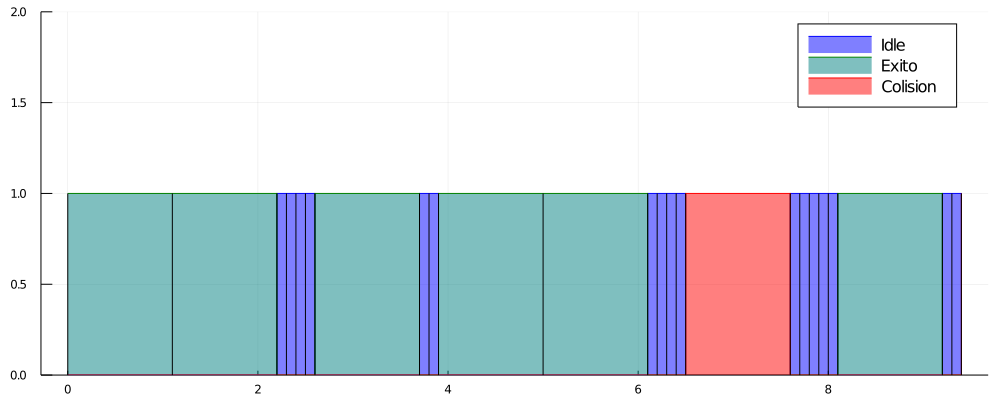

In [9]:
plot(T,X.=="Idle",lt=:steppost, fill=(0,:blue), color=:blue, fillalpha=0.5, label="Idle", ylim=(0,2))
plot!(T,X.=="Exito",lt=:steppost, fill=(0,:teal), color=:green, fillalpha=0.5, label="Exito")
plot!(T,X.=="Colision",lt=:steppost, fill=(0,:red), color=:red, fillalpha=0.5, label="Colision")
plot!(T,ones(size(T)), lt=:stem, color=:black, label=:none)

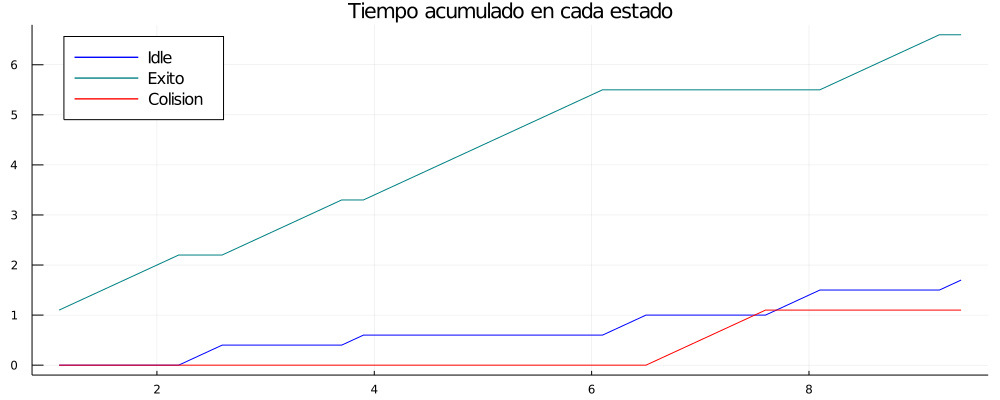

In [10]:
##Calculamos el tiempo acumulado que efectivamente pasamos en cada estado.
acumI=cumsum((X[1:end-1].=="Idle").*diff(T))
acumE=cumsum((X[1:end-1].=="Exito").*diff(T))
acumC=cumsum((X[1:end-1].=="Colision").*diff(T))

plot(T[2:end],acumI, color=:blue, label="Idle",legend=:topleft, title="Tiempo acumulado en cada estado")
plot!(T[2:end],acumE, color=:teal, label="Exito")
plot!(T[2:end],acumC, color=:red, label="Colision")


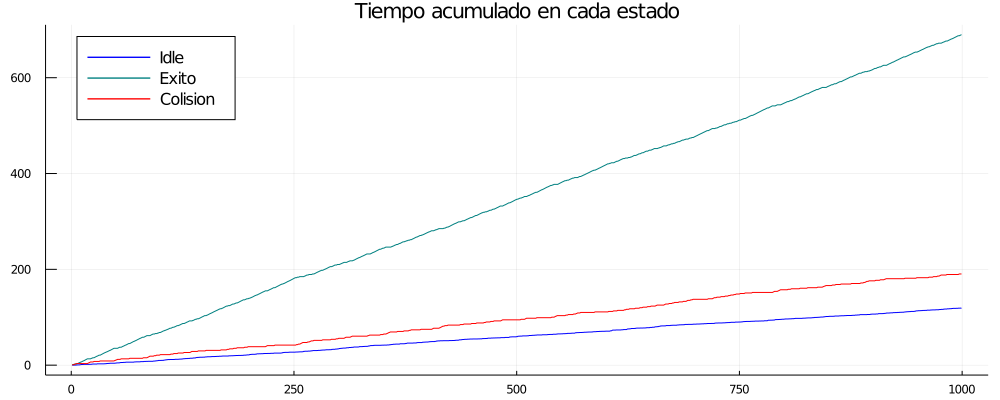

In [11]:
N=10
p=0.05
beta=0.1
Tfinal=1000

T,X = simula_csma(p,N,beta,Tfinal);

acumI=cumsum((X[1:end-1].=="Idle").*diff(T))
acumE=cumsum((X[1:end-1].=="Exito").*diff(T))
acumC=cumsum((X[1:end-1].=="Colision").*diff(T))

plot(T[2:end],acumI, color=:blue, label="Idle", legend=:topleft, title="Tiempo acumulado en cada estado")
plot!(T[2:end],acumE, color=:teal, label="Exito")
plot!(T[2:end],acumC, color=:red, label="Colision")

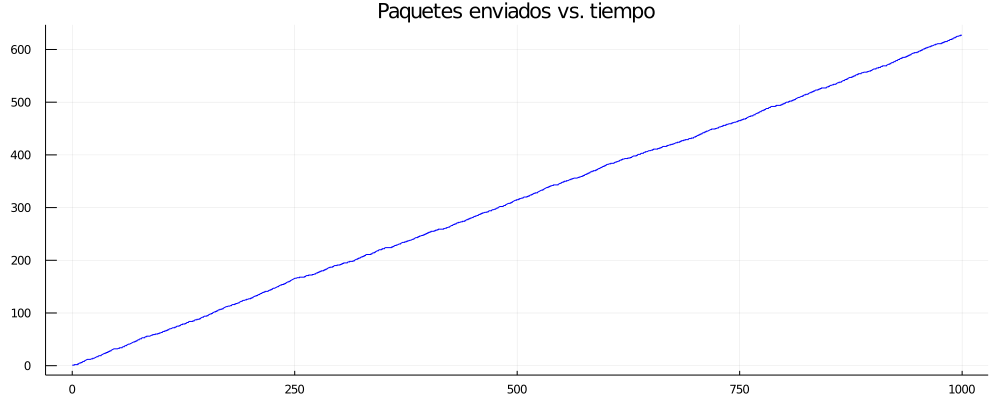

In [12]:
plot(T,cumsum(X.=="Exito"), color=:blue, label=:none, legend=:topleft, title="Paquetes enviados vs. tiempo")

### Throughput de simulación

In [13]:
## Cantidad de paquetes enviados:
Ltot = sum(X.=="Exito")
Ttot = T[end]
Thr_empirico = Ltot/Ttot

println("Throughput de simulacion: ",Thr_empirico)
println("Throughput teorico: ",csma_throughput(p,N,beta))
println()
println("L medio: ",mean(X.=="Exito"))
println("L medio teórico: ",N*p*(1-p)^(N-1))
println()
println("T medio: ",mean(diff(T)))
println("T medio teórico: ",beta+1-(1-p)^N)

Throughput de simulacion: 0.6284399079355345
Throughput teorico: 0.6286613347959504

L medio: 0.3149448345035105
L medio teórico: 0.31512470486230454

T medio: 0.501404917210252
T medio teórico: 0.5012630607616214


## Carrier Sense Multiple Access - Collision Detection

La principal ineficiencia remanente es que los tiempos de colisión siguen siendo comparables al tiempo de transmisión.

**Idea:** Agregar a CSMA la posibilidad de detectar una colisión y abortar la transmisión.

Esto permite que los tiempos de colisión sean cortos, nuevamente comparables al tiempo de propagación en el medio, es decir, se acercan al tamaño de slot. Este mecanismo es el de Ethernet clásico, ya que se puede escuchar el medio mientras se transmite y comparar con lo que se está enviando.

Esto lleva al mecanismo **CSMA/CD**.

### Protocolo CSMA/CD

Consideremos el siguiente protocolo:

> **Protocolo CSMA/CD ($p$-persistente)**:
>
> * Cada estación transmite paquetes de largo $L=1$ durante tiempo $T=1$.
>
> * Todas las estaciones escuchan el medio. Cuando este queda libre un tiempo "corto" $\beta<1$:
>
>      * Se divide el tiempo en slots de tamaño $\beta$.
>      * Cada estación intenta acceder en un slot con probabilidad $p$ de forma independiente.
>
> * Si una única estación accede en un slot, gana el acceso sin interrupciones.
>
> * Si dos o más estaciones acceden *en el mismo slot* se produce una colisión. Las estaciones la detectan y abortan la transmisión al cabo de un tiempo $\beta$.


### Análisis por ciclos de CSMA/CD

Existen 3 tipos de ciclo en este sistema, que se representan en el siguiente diagrama

![Ciclos CSMA](images/csmacd_ciclos.png) 

### Análisis por ciclos de CSMA

Separemos el tiempo en ciclos. Sea $L$ la cantidad de paquetes transmitidos con éxito en un ciclo y $T$ la duración del ciclo, entonces:

**Casos:**

 * Slot Idle: si nadie transmite. Probabilidad $P(X=0) = (1-p)^N$.
 * Éxito: si transmite uno solo. Probabilidad $P(X=1) = Np(1-p)^{N-1}$.
 * Colisión: en otro caso.
 
**Tabla de ciclos**:

| Caso  | Prob.  | $L$ | $T$  |
|---|:-----------:|---|:---:|
| Idle | $$(1-p)^N$$  | $0$  | $\beta$  |
| Exito | $Np(1-p)^{N-1}$  | $1$ | $1+\beta$ |
| Colision | $1-(1-p)^N-Np(1-p)^{N-1}$  | $0$  | $\beta$  |


### Throughput de saturación de CSMA/CD

De la tabla anterior concluimos que:

$$\bar{L} = Np(1-p)^{N-1}, \quad \bar{T} = \beta + Np(1-p)^N$$

De donde el *throughput* de CSMA/CD se calcula como:

$$Thr = \frac{\bar{L}}{\bar{T}} = \frac{Np(1-p)^{N-1}}{\beta + Np(1-p)^{N-1}} = \frac{1}{1+\frac{\beta}{Np(1-p)^{N-1}}}$$

### Ejemplo


In [14]:
using Plots, LaTeXStrings; default(size=(1000,400), legendfontsize=11)

function csmacd_throughput(p,N,beta)
   return N*p*(1-p)^(N-1)/(beta+N*p*(1-p)^(N-1)) 
end

csmacd_throughput (generic function with 1 method)

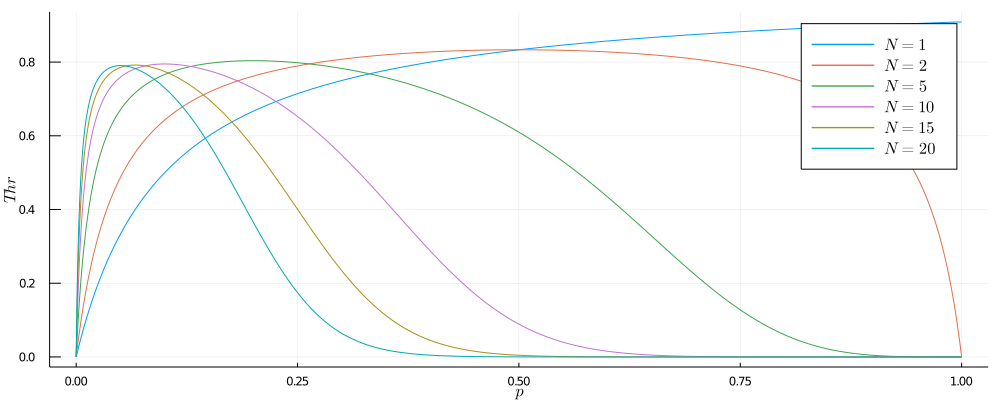

In [15]:
beta=0.1
p=0:0.001:1
NN=[1,2,5,10,15,20]
plt=plot()
for N in NN
    plot!(p,csmacd_throughput.(p,N,beta),xlabel=L"p", ylabel=L"Thr",label=L"N=%$N")
end
plt

### Probabilidad óptima de acceso

En este caso puede volver a calcularse la probabilidad óptima de acceso. Basta observar que para maximizar el Throughput, hay que minimizar el denominador, y esto corresponde a maximizar:
$$Np(1-p)^{N-1}.$$

Es decir, maximizar la probabilidad de éxito, al igual que en ALOHA. Por lo tanto:

$$p^* = \frac{1}{N} \quad Thr^* = \frac{1}{1+\frac{\beta}{(1-1/N)^{N-1}}}$$

**Observaciones:**

 * La probabilidad de acceso se vuelve *independiente* del tamaño de slot, solo depende de la congestión.
 
 * Para $N\to\infty$, el Throughput óptimo verifica:
 
 $$Thr^* \approx \frac{1}{1+e\beta} \approx \frac{1}{1+2.78\beta}.$$
 
 Nuevamente, cuanto más pequeño $\beta$ más eficiente el sistema.

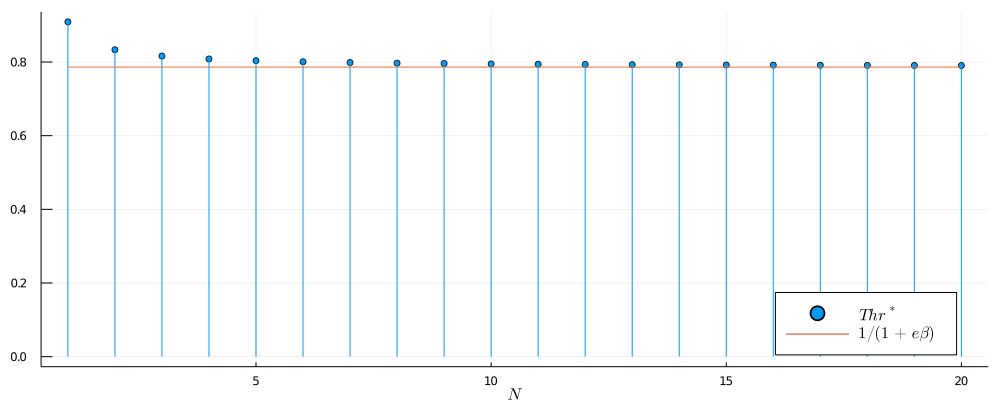

In [16]:
function max_throughput_csmacd(N,beta)
    return 1/(1+beta/(1-1/N)^(N-1))
end

beta=0.1
NN=1:20

plot(NN,max_throughput_csmacd.(NN,beta), lt=:stem, marker=:circle, label=L"Thr^*", xlabel=L"N",legend=:bottomright)
plot!(NN,1/(1+exp(1)*beta)*ones(size(NN)), label=L"1/(1+e\beta)")

### Simulación

In [17]:
using Distributions

function simula_csmacd(p,N,beta,Tfinal)
    
    t = 0.0 
    T = Float64[]
    X = String[];
    k=1
    
    d=Binomial(N,p)
    
    while t<Tfinal

        push!(T,t)

        aux = rand(d)
        if aux == 0
            push!(X,"Idle")
            t = t+beta
        elseif aux==1
            push!(X,"Exito")
            t = t+1+beta
        else
            push!(X,"Colision")
            t = t+beta
        end
    
        
    end
    
    return T,X
end

simula_csmacd (generic function with 1 method)

In [18]:
N=10
p=0.05
beta=0.1
Tfinal=10

T,X = simula_csmacd(p,N,beta,Tfinal)

([0.0, 1.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5000000000000004, 2.6000000000000005, 2.7000000000000006, 2.8000000000000007, 2.900000000000001  …  5.1, 5.199999999999999, 5.299999999999999, 6.399999999999999, 6.499999999999998, 6.599999999999998, 7.6999999999999975, 7.799999999999997, 8.899999999999997, 8.999999999999996], ["Exito", "Exito", "Idle", "Idle", "Idle", "Idle", "Idle", "Idle", "Idle", "Idle"  …  "Idle", "Idle", "Exito", "Colision", "Idle", "Exito", "Idle", "Exito", "Idle", "Exito"])

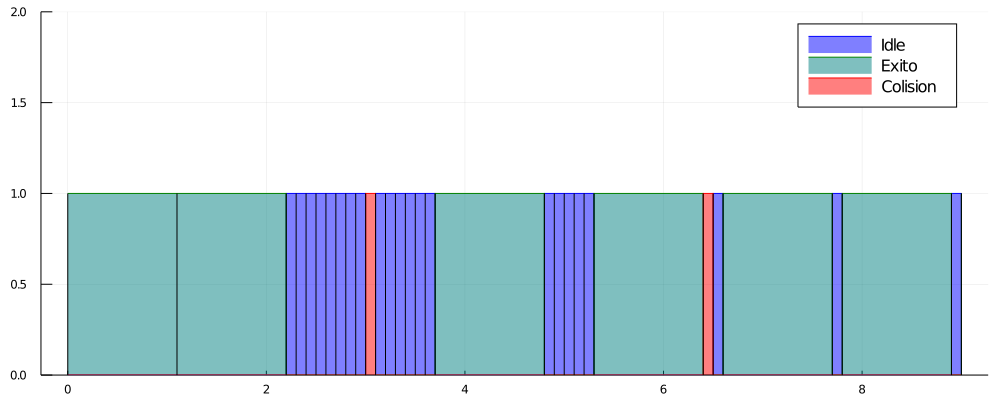

In [19]:
plot(T,X.=="Idle",lt=:steppost, fill=(0,:blue), color=:blue, fillalpha=0.5, label="Idle", ylim=(0,2))
plot!(T,X.=="Exito",lt=:steppost, fill=(0,:teal), color=:green, fillalpha=0.5, label="Exito")
plot!(T,X.=="Colision",lt=:steppost, fill=(0,:red), color=:red, fillalpha=0.5, label="Colision")
plot!(T,ones(size(T)), lt=:stem, color=:black, label=:none)

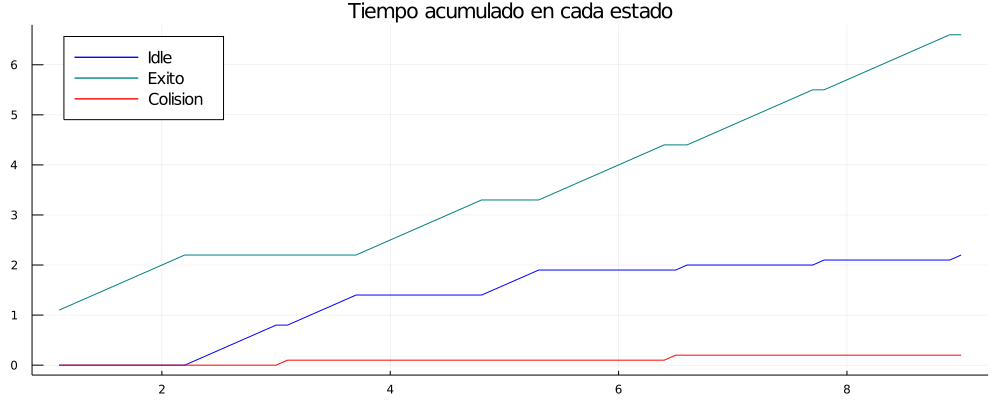

In [20]:
##Calculamos el tiempo acumulado que efectivamente pasamos en cada estado.
acumI=cumsum((X[1:end-1].=="Idle").*diff(T))
acumE=cumsum((X[1:end-1].=="Exito").*diff(T))
acumC=cumsum((X[1:end-1].=="Colision").*diff(T))

plot(T[2:end],acumI, color=:blue, label="Idle", legend=:topleft, title="Tiempo acumulado en cada estado")
plot!(T[2:end],acumE, color=:teal, label="Exito")
plot!(T[2:end],acumC, color=:red, label="Colision")


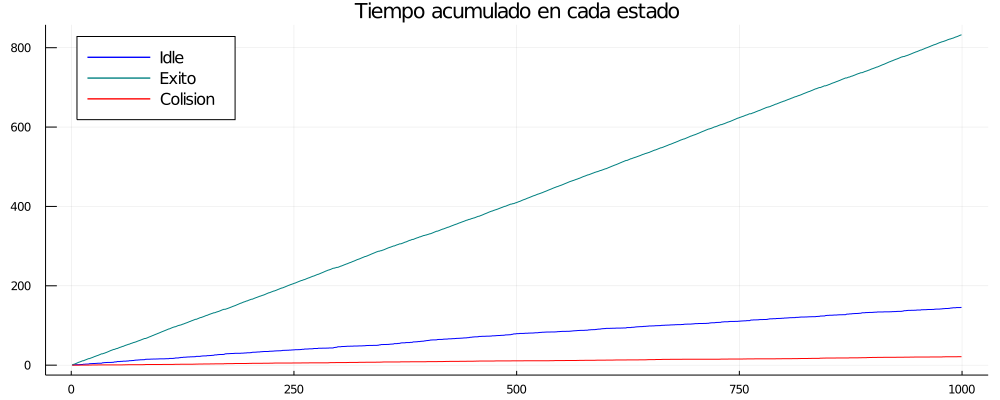

In [21]:
N=10
p=0.05
beta=0.1
Tfinal=1000

T,X = simula_csmacd(p,N,beta,Tfinal);

acumI=cumsum((X[1:end-1].=="Idle").*diff(T))
acumE=cumsum((X[1:end-1].=="Exito").*diff(T))
acumC=cumsum((X[1:end-1].=="Colision").*diff(T))

plot(T[2:end],acumI, color=:blue, label="Idle", legend=:topleft, title="Tiempo acumulado en cada estado")
plot!(T[2:end],acumE, color=:teal, label="Exito")
plot!(T[2:end],acumC, color=:red, label="Colision")

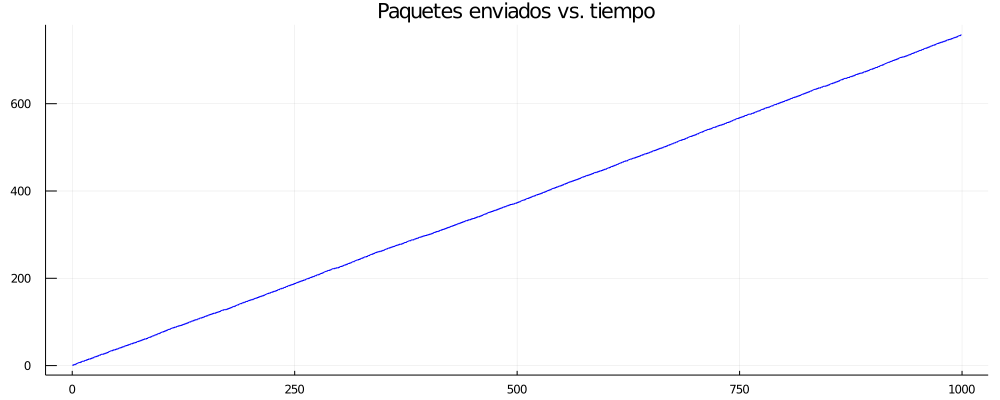

In [22]:
plot(T,cumsum(X.=="Exito"), color=:blue, label=:none, legend=:topleft, title="Paquetes enviados vs. tiempo")

### Throughput de simulación

In [23]:
## Cantidad de paquetes enviados:
Ltot = sum(X.=="Exito")
Ttot = T[end]
Thr_empirico = Ltot/Ttot

println("Throughput de simulacion: ",Thr_empirico)
println("Throughput teorico: ",csmacd_throughput(p,N,beta))
println()
println("L medio: ",mean(X.=="Exito"))
println("L medio teórico: ",N*p*(1-p)^(N-1))
println()
println("T medio: ",mean(diff(T)))
println("T medio teórico: ",beta+N*p*(1-p)^(N-1))

Throughput de simulacion: 0.7584550730437974
Throughput teorico: 0.7591085309336872

L medio: 0.31257731958762885
L medio teórico: 0.31512470486230454

T medio: 0.412293729372953
T medio teórico: 0.41512470486230457
